1. Загрузить таблицу Mushroom из репозитория UCI (любого источника) в объект
DataFrame.

Вычислить распределение значений категориальных признаков по классам
(использовать pd.groupby).

Визуализировать распределения.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = ['classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
                'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
                'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                'ring-type', 'spore-print-color', 'population', 'habitat']
df = pd.read_csv(url, header=None, names=column_names)
df


,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [2]:
print(f"\nРаспределение по классам")
print(df['classes'].value_counts())



Распределение по классам
e    4208
p    3916
Name: classes, dtype: int64


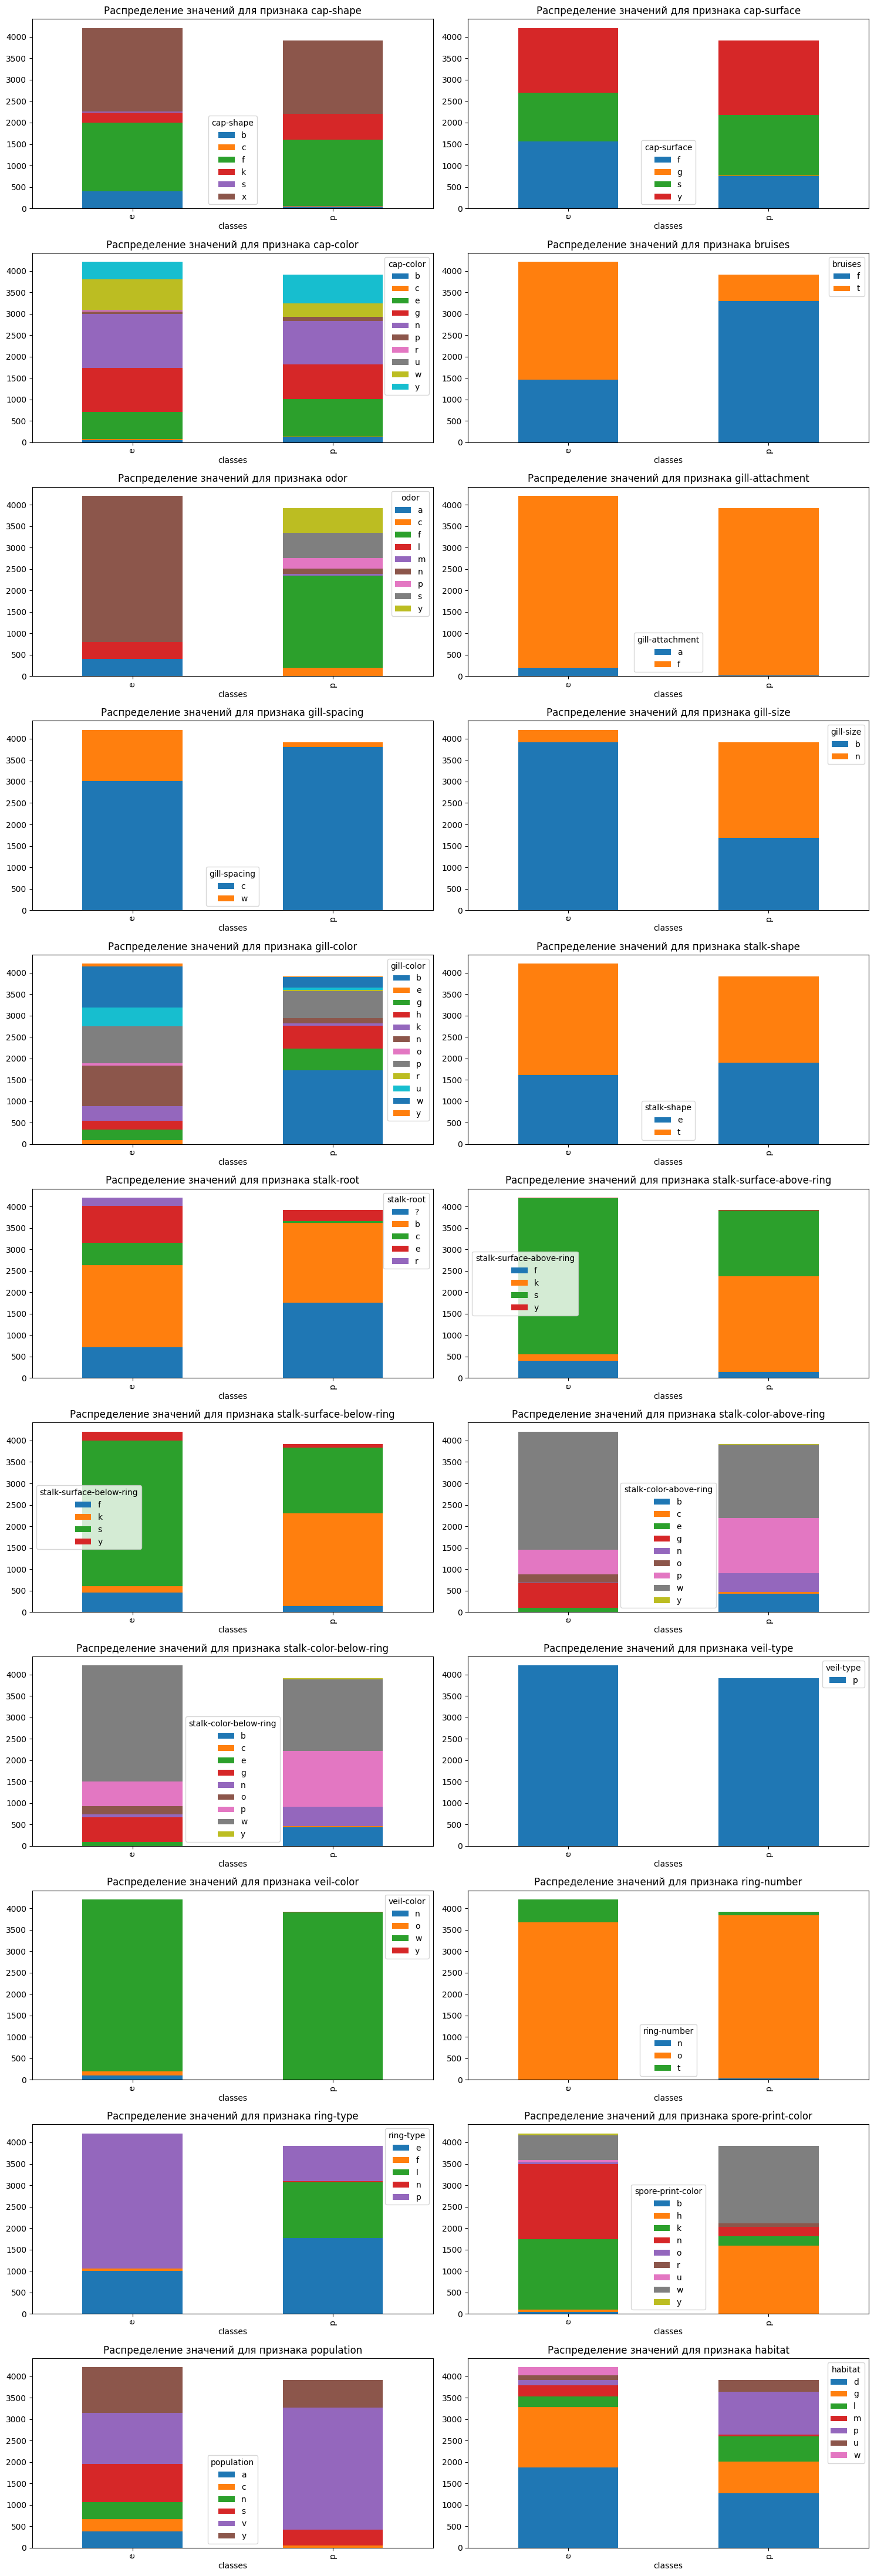

In [3]:
categorical_features = column_names[1:]

fig, axs = plt.subplots(len(categorical_features)//2, 2,
                        figsize=(15, len(categorical_features)*2))

for i, feature in enumerate(categorical_features):
    df_grouped = df.groupby(['classes', feature]).size().unstack(fill_value=0)
    df_grouped.plot(kind='bar', stacked=True, ax=axs[i//2, i % 2])
    axs[i//2, i %
        2].set_title(f'Распределение значений для признака {feature}')

plt.tight_layout()
plt.show()


2. Построить решающую функцию по каждой переменной на основе частот.
Вычислить точность каждого решения (на той же обучающей выборке). Найти
наиболее информативную переменную (с минимальным числом ошибок).

In [4]:
from sklearn.metrics import accuracy_score

# Инициализация словаря для хранения точности каждого признака
accuracy_dict = {}

# Обработка каждой переменной
for column in categorical_features:
    # Построение решающей функции на основе частот
    # Группируем по столбцу, выбираем 'classes' на основе того, какая комбинация встречается чаще
    decision_function = df.groupby(column)['classes'].apply(
        lambda x: x.value_counts().index[0])

    # Применение решающей функции к данным
    predictions = df[column].map(decision_function)

    # Вычисление точности
    accuracy = accuracy_score(df['classes'], predictions)

    # Сохранение результатов
    accuracy_dict[column] = accuracy

# Нахождение наиболее информативной переменной
best_variable = max(accuracy_dict, key=accuracy_dict.get)
print(
    f"Наиболее информативная переменная: {best_variable} с точностью {accuracy_dict[best_variable]*100:3.1f}%")


Наиболее информативная переменная: odor с точностью 98.5%


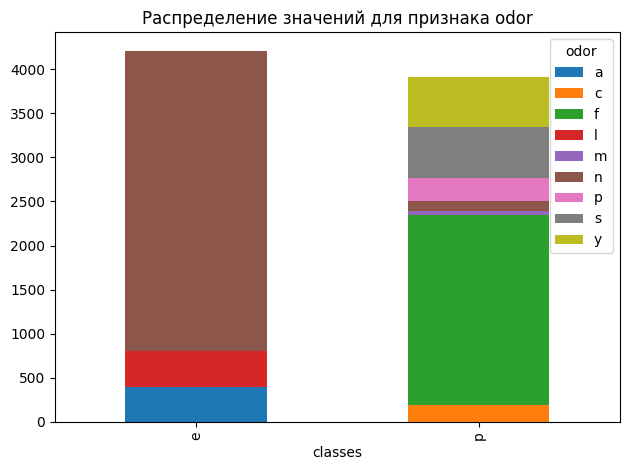

In [5]:
feature = 'odor'
df_grouped = df.groupby(['classes', feature]).size().unstack(fill_value=0)
df_grouped.plot(kind='bar', stacked=True)
plt.title(f'Распределение значений для признака {feature}')

plt.tight_layout()
plt.show()

3. Построить «наивный» байесовский классификатор из sklearn. Оценить точность.

https://scikit-learn.org/stable/modules/naive_bayes.html

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split

df_enc = df.copy()
# Кодирование категориальных переменных
le = LabelEncoder()
for col in df_enc.columns:
    df_enc[col] = le.fit_transform(df_enc[col])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df_enc.drop(
    'classes', axis=1), df_enc['classes'], test_size=0.2, random_state=42)


In [7]:
# Создание и обучение модели
model = CategoricalNB()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy*100:3.1f}%")


Точность модели: 95.1%


4. Самостоятельно реализовать метод, не используя готовый. Сравнить полученное
решение с библиотечным. Добавить регуляризатор в оценки частот.

Сглаживание Лапласа используется для обработки ситуаций, когда мы сталкиваемся с неизвестными значениями признаков во время предсказания. Это может произойти, если во время обучения мы не видели некоторых значений признаков, которые появляются во время тестирования.

Вероятность такого неизвестного значения признака можно оценить следующим образом:

$$P(x_i | y) = \frac{N_{yi} + \alpha}{N_y + k\alpha}$$

где:
- $x_i$ - значение признака
- $y$ - класс
- $N_{yi}$ - количество раз, когда признак $i$ принимает значение $x_i$ для класса $y$
- $N_y$ - общее количество записей класса $y$
- $\alpha$ - параметр сглаживания (обычно равен 1)
- $k$ - количество уникальных значений признака

Если мы столкнулись с неизвестным значением признака (т.е., значение признака, которое не было видно во время обучения), то $N_{yi}$ будет равно 0. Тогда формула упрощается до:

$$P(x_i | y) = \frac{\alpha}{N_y + k\alpha}$$

In [8]:
# Создаем класс для нашего классификатора
class NaiveBayes:
    def __init__(self, alpha=1):
        self.classes = None
        self.class_freq = {}
        self.cond_counts = {}
        self.alpha = alpha

    # Функция для обучения модели
    def fit(self, X, y):
        X = X.to_numpy()
        y = y.to_numpy()

        # ЧАСТОТЫ КЛАССОВ
        # Найти уникальные классы и посчитать их количество
        self.classes = np.unique(y)
        # Для каждого класса посчитать частоты и записать в словарь
        for cl in self.classes:
            self.class_freq[cl] = np.sum(y == cl) / np.shape(X)[0]

        # УСЛОВНЫЕ ВЕРОЯТНОСТИ
        # Поклассовый проход
        for cl in self.classes:
            # Создать словарь для каждого класса
            self.cond_counts[cl] = {}
            # Извлечь все образцы этого класса
            X_cl = X[y == cl]
            # Для каждого признака
            for i in range(np.shape(X)[1]):
                # Словарь условных вероятностей для данного признака
                self.cond_counts[cl][i] = {}
                # Найти уникальные значения для этого признака
                unique_values = np.unique(X_cl[:, i])
                # Для каждого уникального значения признака
                for val in unique_values:
                    # Посчитать количество вхождений данного значения
                    # признака в данном классе для будущего вычисления
                    # условных вероятносей со сглаживанием
                    self.cond_counts[cl][i][val] = np.sum(
                        X_cl[:, i] == val)

    # Функция для предсказания класса
    def predict(self, X):
        X = X.to_numpy()

        y_pred = []
        for x in X:
            # Апостерирорные вероятности классов
            post_prob = []
            for c in self.classes:
                # Для большей точности переходим к сумме логарифмов
                # Считаем логарифм апостериорной вероятности как
                # сумму логарифмов априорной и условных вероятностей
                aprior = np.log(self.class_freq[c])
                cond = 0
                for i, val in enumerate(x):
                    # Количество раз, когда признак i принимает значение val для класса c
                    count_feature = self.cond_counts[c][i].get(val, 0)
                    # Общее количество записей класса c
                    total_feature = sum(self.cond_counts[c][i].values())
                    # Количество уникальных значений признака
                    k = len(self.cond_counts[c][i])
                    cond += np.log((count_feature + self.alpha) / (
                        total_feature + k * self.alpha))
                post_prob.append(aprior + cond)
            # Выбор по максимальной вероятности
            pred = self.classes[np.argmax(post_prob)]
            y_pred.append(pred)
        return y_pred


In [9]:
clf = NaiveBayes()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy*100:3.1f}%")


Точность модели: 95.1%


5. Применить метод логистической регрессии, использовав в качестве переменных
оценки вероятностей, подвергнутые обратному логистическому преобразованию.

In [10]:
from sklearn.linear_model import LogisticRegression
from scipy.special import logit

# Получим оценки вероятностей принадлежности к классам
probabilities = model.predict_proba(X_train)[:, 1]

# epsilon для избежания бесконечностей после логит-функции
eps = 1e-15
probabilities = probabilities.clip(eps, 1 - eps)
transformed_probabilities = logit(probabilities)

# Создание и обучение модели логистической регрессии
logreg = LogisticRegression()
logreg.fit(transformed_probabilities.reshape(-1, 1), y_train)

# Предсказание на тестовых данных
test_probabilities = model.predict_proba(X_test)[:, 1]
test_probabilities = test_probabilities.clip(eps, 1 - eps)
transformed_test_probabilities = logit(test_probabilities)
y_pred = logreg.predict(transformed_test_probabilities.reshape(-1, 1))

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy*100:3.1f}%")


Точность модели: 97.4%
